# "Visualizing Quantum Mechanics through QuTip"
> "The intention of this notebook is to present basic concepts of quantum mechanics through an interesting visualization tool built specifically for this purpose."
"
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [plot_schmidt, plot_qubism, complex_array_to_rgb, Entanglement]


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from qutip import *

## Introduction - The Color system

As many of you already know, quantum mechanics is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles. In the scope of this theory, complex numbers are as natual as real numbers. And why is that?

A underlying feature of the theory is that it usually cannot predict with certainty what will happen, only probabilities. Mathematically, a probability is found by taking the **square of the absolute value of a complex number, known as a probability amplitude**. This is known as the [Born rule](https://en.wikipedia.org/wiki/Born_rule), named after the renowned physicist Max Born. 

Briefly mentioning then, my intention here will be to use tools from the QuTip python package that were developed specifically to assist in the visualization and construction of quantum systems in python. QuTiP is open-source software for simulating the dynamics of open quantum systems. The QuTiP library depends runs dependently on `Numpy`, `Scipy`, and `Cython` numerical packages. In addition, graphical output is provided by `Matplotlib`. 

For a longer comment on coloring complex functions which comes from a more mathematical treatment of the situation, there is an IPython Notebook [Visualizing complex-valued functions with Matplotlib and Mayavi](http://nbviewer.ipython.org/github/empet/Math/blob/master/DomainColoring.ipynb) that was made by Emilia Petrisor.

Before going into details of particular plots, we show how `complex_array_to_rgb` maps $z = x + i y$ into colors.There are two variants in this specific function, `theme='light'` and `theme='dark'`, that will only influence the background of the plots. For both, we use hue for phase, with red for positive numbers and aqua for negative. See how the view looks like:

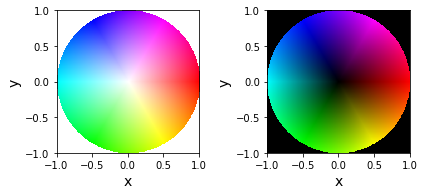

In [4]:
compl_circ = np.array([[(x + 1j*y) if x**2 + y**2 <= 1 else 0j
                        for x in np.arange(-1,1,0.005)]
                       for y in np.arange(-1,1,0.005)])

fig = plt.figure(figsize=(6, 3))
for i, theme in enumerate(['light', 'dark']):
    ax = plt.subplot(1, 2, i + 1)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.imshow(complex_array_to_rgb(compl_circ, rmax=1, theme=theme),
              extent=(-1,1,-1,1))
plt.tight_layout()

AS you may noticed, the RGB (Red, Green, Blue) is the basic color space. The basic geometrical model is the unit cube. Each color is represented as a triple $(r,g,b)$ of real numbers in $[0,1]$, where $r,g,b
$ are quantities of the primary colors (red, green and blue) contained by that color.

![](posts_images/color1.png)

However in applications like ours it is much more appropriate to use the HSV color model, because colors in this space are specified in the same way the humans perceive the color, namely giving the hue, saturation and brightness, which are the variables in question addressed here.

![](posts_images/color2.png)

## The Schmidt plot

Arguably, the easiest way to show entanglement is to plot a wavefunction against two variables.
If the plot is a product of them, the state is a product state. If not - it is entangled.

As writing a wavefunction as a matrix $|\psi\rangle_{ij}$ is the the crucial step in [Schmidt decomposition](http://en.wikipedia.org/wiki/Schmidt_decomposition), 
we call such plots Schmidt plots. The motivation for this representation is quite direct from both its definitions, since a Schmidt plot is a polar plot where the angle indicates dip or drift direction and the distance from the origin indicates the dip or drift magnitude. 

To make this something less abstract and more visual, let consider two simple states:

* entangled: singlet state $|\psi^-\rangle = (|01\rangle - |10\rangle)/\sqrt{2}$,
* product $(|01\rangle - |00\rangle)/\sqrt{2}$.

They may look seamingly similar, but the later can be decomposed into a product $|0\rangle(|1\rangle - |0\rangle)/\sqrt{2}$.

In [5]:
singlet = (ket('01') - ket('10')).unit()
separable = (ket('01') - ket('00')).unit()

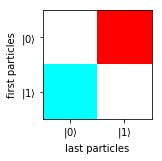

In [6]:
plot_schmidt(singlet, figsize=(2,2));

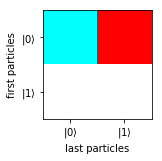

In [7]:
plot_schmidt(separable, figsize=(2,2));

As we see, for separable state the plot is a product of `x` and `y` coordinates, while for the singlet state - is is not. in simple systems like the one in question this separation can be seen as trivial, however this visualization format is extremely useful when dealing with more complex systems

As an example, let us now consider a product of two singlet states: $|\psi^-\rangle|\psi^-\rangle$.
Schmidt plot, by default, makes spliting of equal numbers of particles.

(Also, let's multiply it by the imaginary unit, to get diffeerent colors just for fun.)

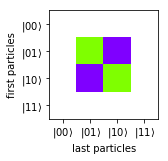

In [8]:
plot_schmidt(1j * tensor([singlet, singlet]), figsize=(2,2));

As we see, we have a product, as the state is a product state with the respect to the splitting of first 2 vs last 2 particles.

But what if we shift particles, getting $|\psi^-\rangle_{23}|\psi^-\rangle_{41}$?

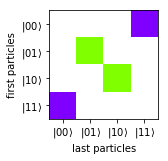

In [9]:
plot_schmidt(1j * tensor([singlet, singlet]).permute([1,2,3,0]), figsize=(2,2));

So we see that it is **entangled**.

`plot_schmidt` allows us to specify other splittings. With parameter `splitting` we decide how many particles we want to have as columns. In general, we can plot systems of various numbers of particles, each being of a different dimension.

For example:

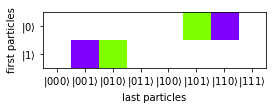

In [10]:
plot_schmidt(1j * tensor([singlet, singlet]), splitting=1, labels_iteration=(1,3), 
             figsize=(4,2));

## Qubism Images

As mentioned at the beginning, one of the topics to be discussed here will be the representation of qubism through QuTip. The qubism is a visualization scheme for quantum many-body wavefunctions. Its main property is its recursivity: increasing the number of qubits results in an increase in the image resolution. Thus, the plots are typically fractal. 

> "And what's the point of that?" - One may wonder

Many features of the wavefunction, such as magnetization, correlations and criticality, can be visualized as properties of the qubism generated images. In particular, factorizability can be easily spotted, and a way to estimate the entanglement entropy can be developed from this imaging method.

Let's start by arranging a system as it follows: The tensor basis is composed of four states: $|00〉$, $|01〉$, $|10〉$ and $|11〉$ . Consider also a unit square, $[0,1] × [0,1]$, and divide it into four 'level-1' squares. 

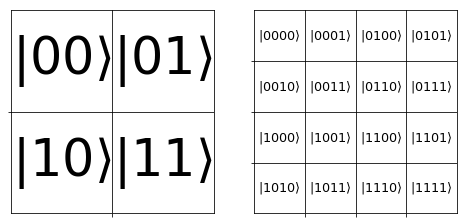

In [11]:
fig = plt.figure(figsize=(8, 4))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(0 * ket('0000'),
                legend_iteration=i, grid_iteration=i,
                fig=fig, ax=ax)

We can associate each of the basis states with one of the big squares with the basic mapping with all amplitudes for states starting with:

* $|00\rangle$ go to the upper left quadrant,
* $|01\rangle$ go to the upper right quadrant,
* $|10\rangle$ go to the lower left quadrant,
* $|11\rangle$ go to the lower right quadrant.

And we proceed recursively with the next particles. So, for example:

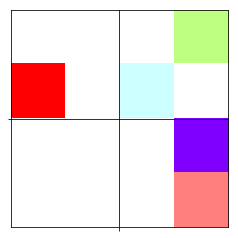

In [12]:
state = ket('0010') + 0.5 * ket('1111') + 0.5j * ket('0101') - 1j * ket('1101') \
        - 0.2 * ket('0110')
plot_qubism(state, figsize=(4,4));

Or if we want to make sure how did we map amplitudes to particular regions in the plot:

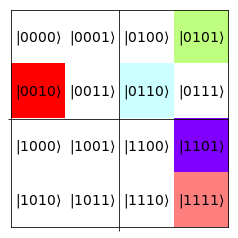

In [13]:
plot_qubism(state, legend_iteration=2, figsize=(4,4));

Or how about making it dark? (E.g. to fit out slides with black background in your presentation).

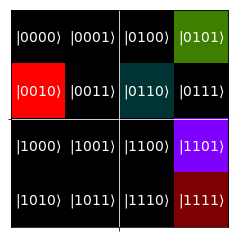

In [14]:
plot_qubism(state, legend_iteration=2, theme='dark', figsize=(4,4));

The most important property of Qubism is the recursive structure that I have mentioned to you before, so that we can add more particles seamlessly.
For example, let's consider a plot of `k` copies of the singlet states, i.e. $|\psi^-\rangle^{\otimes k}$:

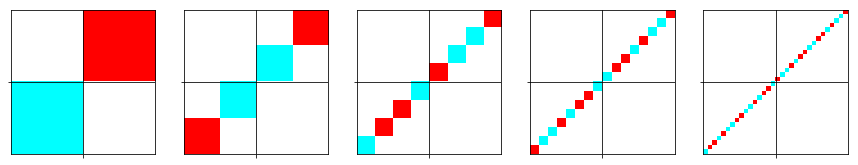

In [15]:
fig = plt.figure(figsize=(15, 3))
for k in range(1,6):
    ax = plt.subplot(1, 5, k)
    plot_qubism(tensor([singlet]*k),
                fig=fig, ax=ax)

OK, but once we can type the wavefunction by hand, plots offer little added value.

Let's see how we can plot ground states.
Before doing that, we define some functions to easy make a translationally-invariant Hamiltonian.

In [16]:
def spinchainize(op, n, bc='periodic'):
    
    if isinstance(op, list):
        return sum([spinchainize(each, n, bc=bc) for each in op])
    
    k = len(op.dims[0])
    d = op.dims[0][0]

    expanded = tensor([op] + [qeye(d)]*(n - k))

    if bc == 'periodic':
        shifts = n
    elif bc == 'open':
        shifts = n - k + 1

    shifteds = [expanded.permute([(i + j) % n for i in range(n)])
                for j in range(shifts)]

    return sum(shifteds)


def gs_of(ham):
    gval, gstate = ham.groundstate()
    return gstate

For example, let us consider Hamiltonian for $N$ particles, of the following form (a generalization of the [Majumdar-Ghosh model](http://en.wikipedia.org/wiki/Majumdar%E2%80%93Ghosh_Model)):

$$H = \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+1} + J \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+2},$$

where $\vec{S}_i = \tfrac{1}{2} (\sigma^x, \sigma^y, \sigma^z)$ is the spin operator (with sigmas being [Pauli matrices](http://en.wikipedia.org/wiki/Pauli_matrices)).

Moreover, we can set two different boundary conditions:

* periodic - spin chain forms a loop ($N+1 \equiv 1$ and $N+2 \equiv 2$),
* open - spin chain forms a line (we remove terms with $N+1$ and $N+2$).

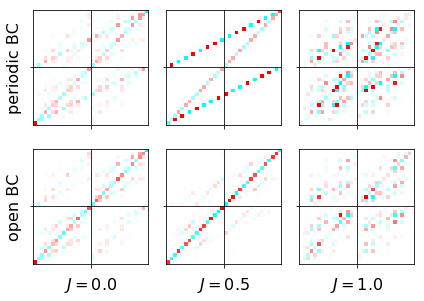

In [17]:
heis = sum([tensor([pauli]*2) for pauli in [sigmax(), sigmay(), sigmaz()]])
heis2 = sum([tensor([pauli, qeye(2), pauli]) for pauli in [sigmax(), sigmay(), sigmaz()]])

N = 10
Js = [0., 0.5, 1.]

fig = plt.figure(figsize=(2*len(Js), 4.4))

for b in [0, 1]: 
    for k, J in enumerate(Js):
        ax = plt.subplot(2, len(Js), b*len(Js) + k + 1)
        
        if b == 0:
            spinchain = spinchainize([heis, J*heis2], N, bc='periodic')
        elif b ==1:
            spinchain = spinchainize([heis, J*heis2], N, bc='open')

        plot_qubism(gs_of(spinchain), ax=ax)
        
        if k == 0:
            if b == 0:
                ax.set_ylabel("periodic BC",
                              fontsize=16)
            else:
                ax.set_ylabel("open BC",
                              fontsize=16)
        if b == 1:
            ax.set_xlabel("$J={0:.1f}$".format(J),
                          fontsize=16)

plt.tight_layout()

We are not restricted to qubits. We can have it for other dimensions, e.g. qutrits.

Let us consider [AKLT model](http://en.wikipedia.org/wiki/AKLT_Model) for spin-1 particles:

$$H = \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+1} + \tfrac{1}{3} \sum_{i=1}^N (\vec{S}_i \cdot \vec{S}_{i+1})^2.$$

where $\vec{S}_i$ is [spin operator](http://en.wikipedia.org/wiki/Pauli_matrices#Physics) for spin-1 particles (or for `qutip`: `jmat(1, 'x')`, `jmat(1, 'y')` and `jmat(1, 'z')`).

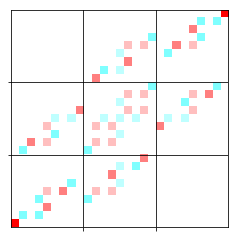

In [18]:
ss = sum([tensor([jmat(1, s)]*2) for s in ['x', 'y', 'z']])
H = spinchainize([ss, (1./3.) * ss**2], n=6, bc='periodic')
plot_qubism(gs_of(H), figsize=(4,4));

Note that qubism for qutrits works similarly as for qubits; you can visualize the base of the system once again characterizing it as:

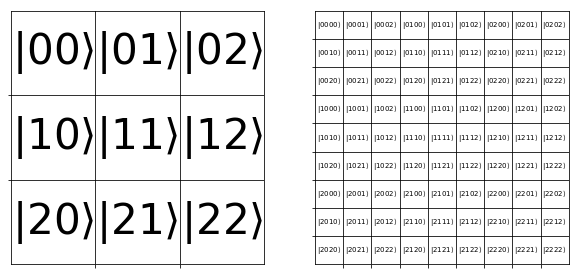

In [19]:
fig = plt.figure(figsize=(10, 5))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(0 * ket('0000', dim=3),
                legend_iteration=i, grid_iteration=i,
                fig=fig, ax=ax)

Just in this case we interpret:

* 0 as $s_z=-1$,
* 1 as $s_z=\ \ 0$,
* 2 as $s_z=+1$.

While qubism works best for translationally-invariants states (so in particular, all particles need to have the same dimension), we can do it for others too.

Also, there are a few other Qubism-related plotting schemes. For example `how='pairs_skewed'`:

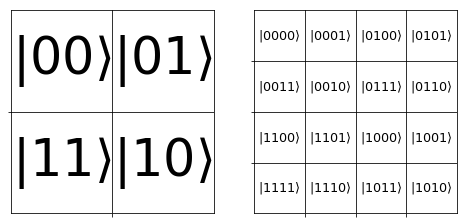

In [20]:
fig = plt.figure(figsize=(8, 4))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(0 * ket('0000'),
                how='pairs_skewed',
                legend_iteration=i, grid_iteration=i,
                fig=fig, ax=ax)

The one above emphasis ferromagnetic (put on the left) vs antiferromagnetic (put on the right) states, which can obviously be particularly useful for performing electromagnetic analysis of systems.

Another one `how='before_after'` (inspired by [this](http://commons.wikimedia.org/wiki/File:Ising-tartan.png) - Ising tartan model) works in a bit different way: it uses typical recursion, but starting from middle particles. For example, the top left quadrant correspons to $|00\rangle_{N/2,N/2+1}$: 

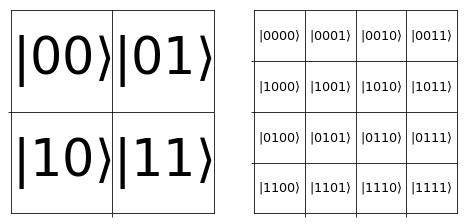

In [21]:
fig = plt.figure(figsize=(8, 4))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(0 * ket('0000'),
                how='before_after',
                legend_iteration=i, grid_iteration=i,
                fig=fig, ax=ax)

It is very similar to the Schmidt plot (for the default splitting), with the only difference being ordering of the `y` axis (particle order is reversed). All entanglement properties are the same.

So how does it work on the same example? 
Well, let us take spin chain for (Majumdar-Ghosh model for $J=0$), i.e.
$$H = \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+1}$$

for qubits. Plotting then a comparison of all the models that we explain just before:

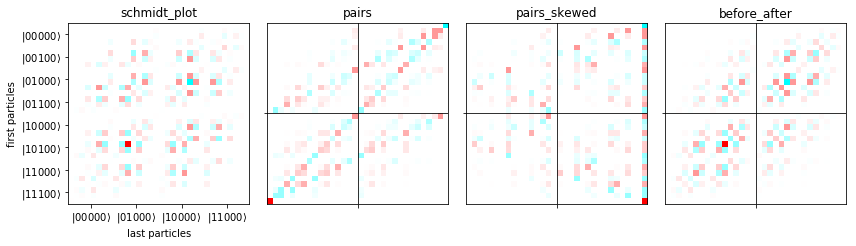

In [22]:
heis = sum([tensor([pauli]*2) for pauli in [sigmax(), sigmay(), sigmaz()]])
N = 10
gs = gs_of(spinchainize(heis, N, bc='periodic'))

fig = plt.figure(figsize=(12, 4))
for i, how in enumerate(['schmidt_plot', 'pairs', 'pairs_skewed', 'before_after']):
    ax = plt.subplot(1, 4, i + 1)
    if how == 'schmidt_plot':     
        plot_schmidt(gs,
                     fig=fig, ax=ax)
    else:
        plot_qubism(gs,
                    how=how,
                    fig=fig, ax=ax)
    ax.set_title(how)
plt.tight_layout()

## Analyzing entanglement

As we have already dealt with here, entanglement is the physical phenomenon that occurs when a group of particles are generated, interact, or share spatial proximity in a way such that the quantum state of each particle of the group cannot be described independently of the state of the others, including when the particles are separated by a large distance. 

To better analyze this property of particles and systems using what we have seen so far, we will define a series of different partitions as:

In [23]:
product_1 = ket('0000')
product_2 = tensor([(ket('0') + ket('1')).unit()]*4)
w = (ket('0001') + ket('0010') + ket('0100') + ket('1000')).unit()
dicke_2of4 = (ket('0011') + ket('0101') + ket('0110') + ket('1001') + ket('1010') + ket('1100')).unit()
ghz = (ket('0000') + ket('1111')).unit()

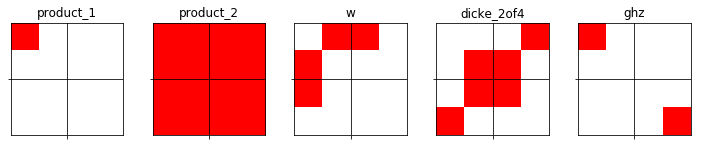

In [24]:
states = ['product_1', 'product_2', 'w', 'dicke_2of4', 'ghz']
fig = plt.figure(figsize=(2 * len(states), 2))
for i, state_str in enumerate(states):
    ax = plt.subplot(1, len(states), i + 1)
    plot_qubism(eval(state_str), fig=fig, ax=ax)
    ax.set_title(state_str)
plt.tight_layout()

Then entanglement (or exactly: Schmidt rank) for a given partition is equal to number to different, non-zero squares. (We don't allow rotations, we do allow multiplication by a factor and, what may be more tricky, linear superposition.)

Here we use partition of first 2 particles vs last 2, as indicated by lines.

That is,
* `product_1` - only 1 non-zero square: Schmidt rank 1,
* `product_2` - 4 non-zero squares, but they are the same: Schmidt rank 1,
* `w` - 3 non-zero quares, but two of them are the same: Schmidt rank 2,
* `dicke_2of4` - 4 non-zero squares, but two of them are the same: Schmidt rank 3,
* `ghz` - 2 non-zero squares, each one different: Schmidt rank 2.

This is basis-independent, but it may be easier to work in one basis rather than another.

And for a comparision, let us see product states:

$$\left( \cos(\theta/2) |0\rangle + \sin(\theta/2) e^{i \varphi} |1\rangle \right)^N $$

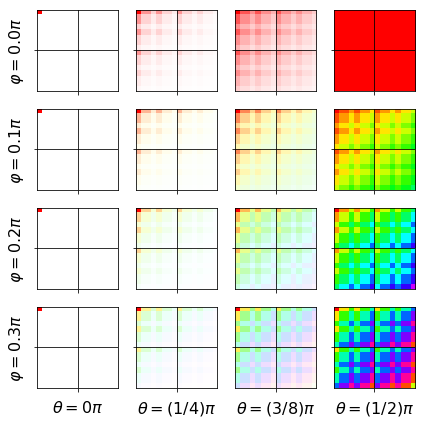

In [25]:
def product_state(theta, phi=0, n=1):
    single = Qobj([[np.cos(theta/2.)], [np.sin(theta/2.) * np.exp(1j*phi)]])
    return tensor([single]*n)

thetas = 0.5 * np.pi * np.array([0., 0.5, 0.75, 1.])
phis = np.pi * np.array([0., 0.1, 0.2, 0.3])

fig, axes2d = plt.subplots(nrows=len(phis), ncols=len(thetas),
                           figsize=(6,6))

for i, row in enumerate(axes2d):
    for j, cell in enumerate(row):
        plot_qubism(product_state(thetas[j], phi=phis[i], n=8),
                    grid_iteration=1,
                    ax=cell)
        if i == len(axes2d) - 1:
            cell.set_xlabel("$\\theta={0:s}\pi$".format(["0", "(1/4)", "(3/8)", "(1/2)"][j]),
                            fontsize=16)
        if j == 0:
            cell.set_ylabel("$\\varphi={0:.1f}\pi$".format(phis[i] / np.pi),
                            fontsize=16)

plt.tight_layout()

In each plot squares are the same, up to a factor (which is visualized as intensity and hue).

You can lookup previous plots. Setting `grid_iteration=2` would show splitting of the first 4 particles vs N-4 others.
And for `how='before_after'` it is the middle particles vs all others.

## More about

For more information about QuTiP: 

* http://qutip.org.

For more information about Qubism:

* J. Rodriguez-Laguna, P. Migdał, M. Ibanez Berganza, M. Lewenstein, G. Sierra,
  [Qubism: self-similar visualization of many-body wavefunctions](http://dx.doi.org/10.1088/1367-2630/14/5/053028), New J. Phys. 14 053028 (2012), [arXiv:1112.3560](http://arxiv.org/abs/1112.3560),
* [its video abstract](https://www.youtube.com/watch?v=8fPAzOziTZo),
* [C++/Mathematica codes for qubism on GitHub ](https://github.com/stared/qubism).